ココに相関を図示していく

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

path = "../data/format_data.csv"
df = pd.read_csv(path)
df1 = df[["Rank","Kinryou","Time_x","Nobori","Ninki","Race Number","Distance","Weight","Weight Change","Sex","Age","Ground_ダ","Ground_芝","Ground_障","Condition_不","Condition_稍","Condition_良","Condition_重","Weather_小雨","Weather_小雪","Weather_晴","Weather_曇","Weather_雨","Weather_雪"]]
df1 = df1.dropna()
df = df[["Rank","Kinryou","Time_x","Nobori","Ninki","Race Number","Distance","Weight","Weight Change","Sex","Age"]] # ,"Ground_ダ","Ground_芝","Ground_障","Condition_不","Condition_稍","Condition_良","Condition_重","Weather_小雨","Weather_小雪","Weather_晴","Weather_曇","Weather_雨","Weather_雪"
df = df.dropna()

/tmp/ipykernel_2859/3098561567.py:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


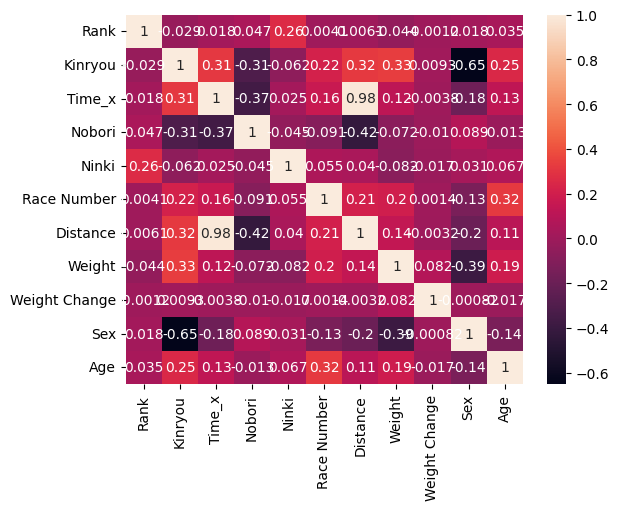

,Rank,Kinryou,Time_x,Nobori,Ninki,Race Number,Distance,Weight,Weight Change,Sex,Age
Rank,1.000000,-0.028529,0.018252,0.046973,0.263726,0.004145,0.006058,-0.043624,-0.001205,0.018054,0.034578
Kinryou,-0.028529,1.000000,0.314045,-0.314916,-0.062437,0.216924,0.316800,0.334227,0.009278,-0.650609,0.247534
Time_x,0.018252,0.314045,1.000000,-0.365299,0.024788,0.163494,0.982689,0.121728,-0.003831,-0.182805,0.129474
Nobori,0.046973,-0.314916,-0.365299,1.000000,-0.044759,-0.091150,-0.424538,-0.071922,-0.010353,0.088940,-0.013390
Ninki,0.263726,-0.062437,0.024788,-0.044759,1.000000,0.054939,0.040222,-0.082161,-0.017290,0.031166,0.066510
Race Number,0.004145,0.216924,0.163494,-0.091150,0.054939,1.000000,0.212508,0.195540,0.001396,-0.134969,0.320000
Distance,0.006058,0.316800,0.982689,-0.424538,0.040222,0.212508,1.000000,0.138482,-0.003195,-0.196731,0.107770
Weight,-0.043624,0.334227,0.121728,-0.071922,-0.082161,0.195540,0.138482,1.000000,0.082374,-0.388927,0.187190
Weight Change,-0.001205,0.009278,-0.003831,-0.010353,-0.017290,0.001396,-0.003195,0.082374,1.000000,-0.000824,-0.016715
Sex,0.018054,-0.650609,-0.182805,0.088940,0.031166,-0.134969,-0.196731,-0.388927,-0.000824,1.000000,-0.135994


In [22]:
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()
cor

/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 33437 (\N{CJK UNIFIED IDEOGRAPH-829D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38556 (\N{CJK UNIFIED IDEOGRAPH-969C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31245 (\N{CJK UNIFIED IDEOGRAPH-7A0D}) missing from font(s) DejaVu

,Rank,Kinryou,Time_x,Nobori,Ninki,Race Number,Distance,Weight,Weight Change,Sex,...,Condition_不,Condition_稍,Condition_良,Condition_重,Weather_小雨,Weather_小雪,Weather_晴,Weather_曇,Weather_雨,Weather_雪
Rank,1.000000,-0.028529,0.018252,0.046973,0.263726,0.004145,0.006058,-0.043624,-0.001205,0.018054,...,0.000168,0.000355,0.000949,-0.001910,0.001143,0.000734,-0.002104,0.001844,-0.000074,0.000243
Kinryou,-0.028529,1.000000,0.314045,-0.314916,-0.062437,0.216924,0.316800,0.334227,0.009278,-0.650609,...,-0.012602,0.000101,0.013386,-0.007580,0.014450,0.003670,0.013155,-0.013932,-0.007883,-0.000373
Time_x,0.018252,0.314045,1.000000,-0.365299,0.024788,0.163494,0.982689,0.121728,-0.003831,-0.182805,...,-0.048782,-0.019799,0.071789,-0.035960,0.017844,-0.000092,0.023937,-0.022684,-0.014005,0.001633
Nobori,0.046973,-0.314916,-0.365299,1.000000,-0.044759,-0.091150,-0.424538,-0.071922,-0.010353,0.088940,...,0.080545,0.044277,-0.141794,0.080154,-0.045517,0.009027,-0.017140,0.012263,0.031059,0.009300
Ninki,0.263726,-0.062437,0.024788,-0.044759,1.000000,0.054939,0.040222,-0.082161,-0.017290,0.031166,...,-0.017013,-0.007165,0.025230,-0.012535,0.008613,-0.003507,0.004058,-0.005953,-0.001159,0.000406
Race Number,0.004145,0.216924,0.163494,-0.091150,0.054939,1.000000,0.212508,0.195540,0.001396,-0.134969,...,-0.027319,-0.015429,0.040514,-0.015830,0.002346,-0.006368,-0.006451,0.001432,0.009315,-0.002159
Distance,0.006058,0.316800,0.982689,-0.424538,0.040222,0.212508,1.000000,0.138482,-0.003195,-0.196731,...,-0.065885,-0.032237,0.105701,-0.055125,0.030023,-0.002214,0.024844,-0.023411,-0.020105,-0.000447
Weight,-0.043624,0.334227,0.121728,-0.071922,-0.082161,0.195540,0.138482,1.000000,0.082374,-0.388927,...,-0.011808,0.005161,0.002059,0.002433,0.006412,-0.001864,0.010445,-0.010445,-0.004312,0.001444
Weight Change,-0.001205,0.009278,-0.003831,-0.010353,-0.017290,0.001396,-0.003195,0.082374,1.000000,-0.000824,...,-0.001941,-0.000117,0.002167,-0.001173,-0.001571,0.000617,0.000282,-0.003564,0.006106,0.001834
Sex,0.018054,-0.650609,-0.182805,0.088940,0.031166,-0.134969,-0.196731,-0.388927,-0.000824,1.000000,...,0.011685,0.005591,-0.016233,0.006298,-0.009518,0.003077,-0.007258,0.008301,0.003597,-0.001205


/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12480 (\N{KATAKANA LETTER DA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 33437 (\N{CJK UNIFIED IDEOGRAPH-829D}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38556 (\N{CJK UNIFIED IDEOGRAPH-969C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/shiro/dev/ProjectTeam5/workspace/.venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 31245 (\N{CJK UNIFIE

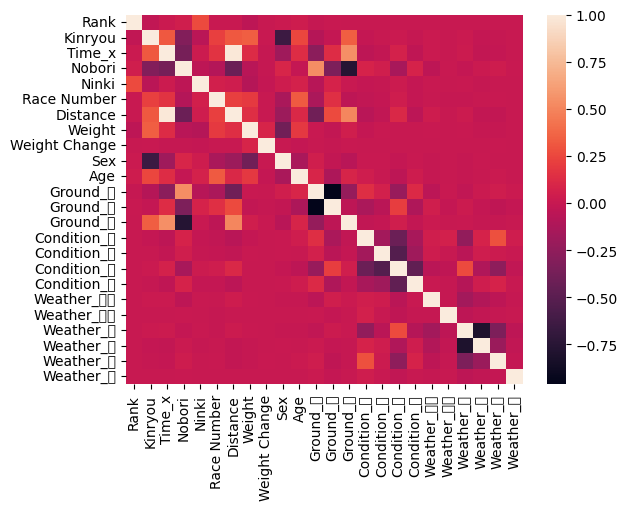

In [23]:
cor1 = df1.corr()
sns.heatmap(cor1)
cor1

In [24]:
# データの準備
X = df.drop('Time_x', axis=1)  
y = df['Time_x']

# 相関が高い特徴を除外（例として）
threshold = 0.8
cor_target = abs(cor['Time_x'])  # 目的変数との相関
selected_features = cor_target[cor_target > threshold].index.tolist()

X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# モデルの作成
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R^2スコア:", r2_score(y_test, y_pred))


KeyError: "['Time_x'] not in index"